### 1. Membaca dataset (load dataset).

In [2]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer_data = load_breast_cancer()

#Seperate data into training(80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=0)

# print top 5
print(X_train[0])
print(y_train[:10])

[1.005e+01 1.753e+01 6.441e+01 3.108e+02 1.007e-01 7.326e-02 2.511e-02
 1.775e-02 1.890e-01 6.331e-02 2.619e-01 2.015e+00 1.778e+00 1.685e+01
 7.803e-03 1.449e-02 1.690e-02 8.043e-03 2.100e-02 2.778e-03 1.116e+01
 2.684e+01 7.198e+01 3.840e+02 1.402e-01 1.402e-01 1.055e-01 6.499e-02
 2.894e-01 7.664e-02]
[1 1 1 1 1 1 1 1 0 1]


### 2. Melakukan pembelajaran dengan algoritma berikut:

#### a. DecisionTreeClassifier

|--- worst concave points <= 0.14
|   |--- worst area <= 957.45
|   |   |--- worst perimeter <= 107.75
|   |   |   |--- radius error <= 1.05
|   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |--- mean concavity <= 0.14
|   |   |   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |   |   |--- worst compactness <= 0.20
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst compactness >  0.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |   |   |--- worst texture <= 32.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst texture >  32.83
|   |   |   |   |   |   |   |   |--- worst texture <= 33.81
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- worst texture >  33.81
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- mean concavity >  0.14
|   |   |   |   |   |   |-

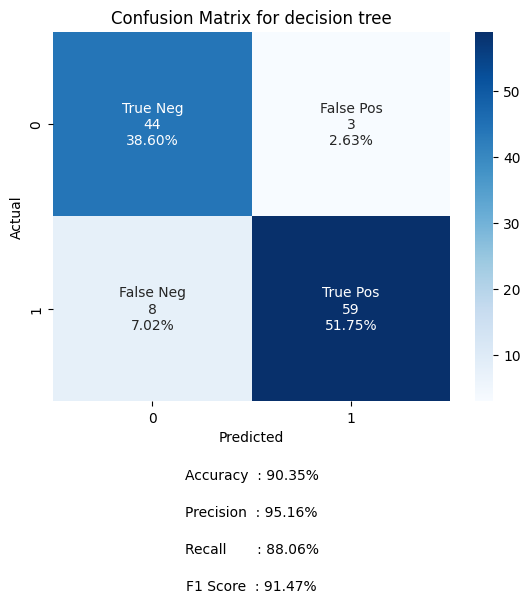

crossvalidate accuracy:  0.9192669172932332
crossvalidate f1 score:  0.9357531084273922
Accuracy:  0.9035087719298246
F1 Score:  0.9147286821705426


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Create Decision Tree classifer object
clf_model = DecisionTreeClassifier()
clf_model = clf_model.fit(X_train,y_train)
print(export_text(clf_model, feature_names=list(cancer_data.feature_names)))

#Save Model
import pickle
pickle.dump(clf_model, open('clf_model.pkl','wb'))

# Load Model
loaded_clf_model = pickle.load(open('clf_model.pkl','rb'))

# Predict the response for test dataset
y_pred = loaded_clf_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for decision tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()



#Cross Validation using cross_validate function with k = 10 for accuracy and f1 score
from sklearn.model_selection import cross_validate
cv_results = cross_validate(loaded_clf_model, cancer_data.data, cancer_data.target, cv=10, scoring=('accuracy', 'f1'))
print("crossvalidate accuracy: ",cv_results['test_accuracy'].mean())
print("crossvalidate f1 score: ",cv_results['test_f1'].mean())
# compare with the results from the previous section
print('Accuracy: ', acc)
print('F1 Score: ', f1)

#### b. Id3Estimator

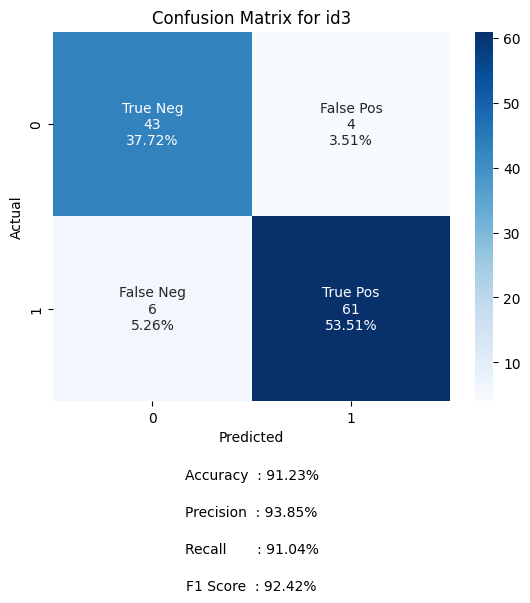

In [3]:
#Fix Skleard import six error
import six
import sys
sys.modules['sklearn.externals.six'] = six

from id3 import Id3Estimator
from id3 import export_graphviz
from id3 import export_text

# Create ID3 classifer object
id3_model = Id3Estimator()
id3_model.fit(X_train, y_train)

#UNCOMMENT TO EXPORT TREE================================================================================================
# export_graphviz(id3_model.tree_, 'tree.dot', cancer_data.feature_names)
# print(export_text(id3_model.tree_, cancer_data.feature_names))
#=======================================================================================================================

#Save model
import pickle
pickle.dump(id3_model, open("id3_model.pkl","wb"))

#Load model
loaded_id3_model = pickle.load(open("id3_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_id3_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for id3')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()


#### c. K Means

/home/christojeffrey/Desktop/tucil-ml/sklearn-venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


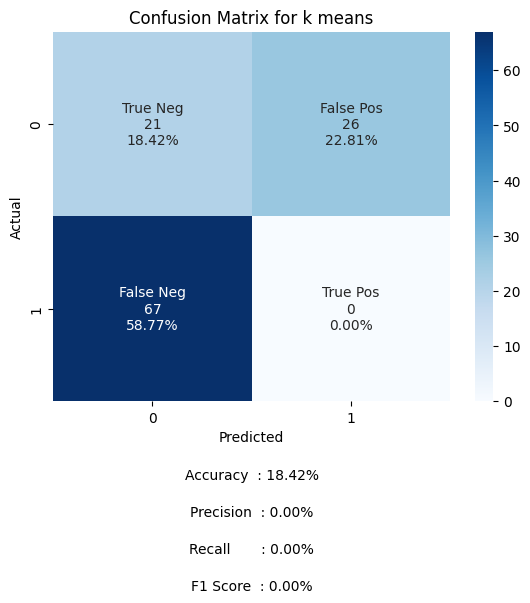

In [4]:
from sklearn.cluster import KMeans

# Create KMeans classifer object
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(X_train)

#Save model
import pickle
pickle.dump(kmeans_model, open("kmeans_model.pkl","wb"))

#Load model
loaded_kmeans_model = pickle.load(open("kmeans_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_kmeans_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for k means')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

#### d LogisticRegression

/home/christojeffrey/Desktop/tucil-ml/sklearn-venv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


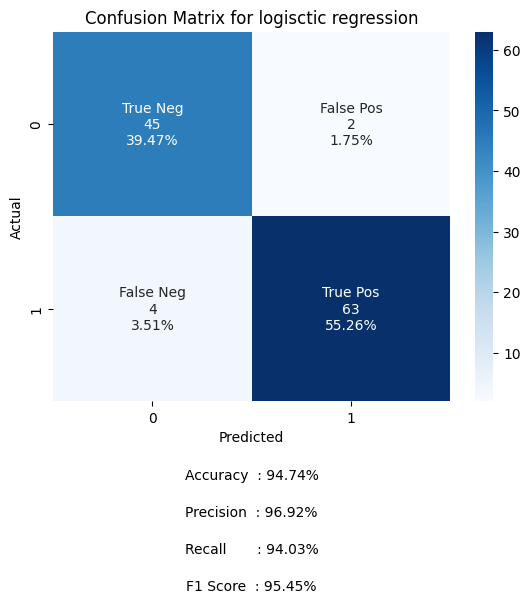

In [5]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifer object
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

#Save model
import pickle
pickle.dump(logreg_model, open("logreg_model.pkl","wb"))

#Load model
loaded_logreg_model = pickle.load(open("logreg_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_logreg_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for logisctic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

#### e. Neural_network

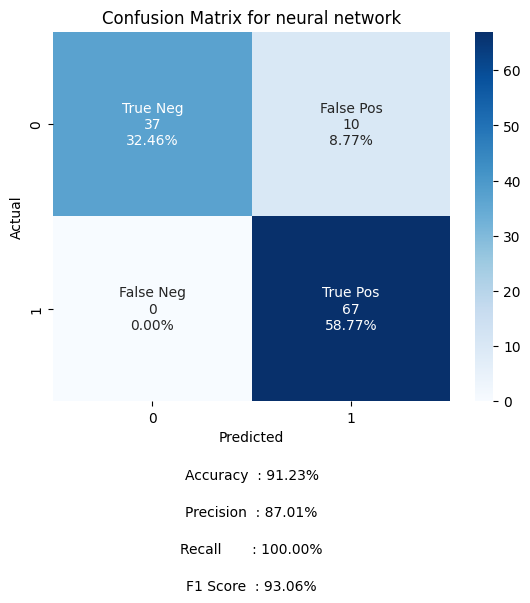

In [8]:
from sklearn.neural_network import MLPClassifier

# Create MLP classifer object
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

#Save model
import pickle
pickle.dump(mlp_model, open("mlp_model.pkl","wb"))

#Load model
loaded_mlp_model = pickle.load(open("mlp_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_mlp_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for neural network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

#### f. SVM

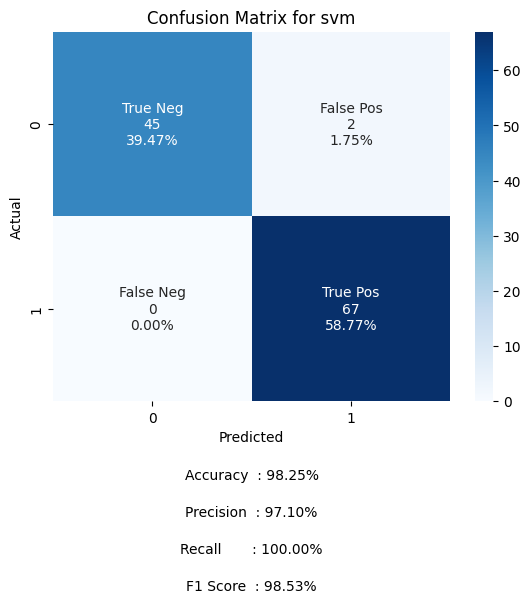

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create SVM classifer object
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model.fit(X_train, y_train)

#Save model
import pickle
pickle.dump(svm_model, open("svm_model.pkl","wb"))

#Load model
loaded_svm_model = pickle.load(open("svm_model.pkl","rb"))

#Predict the response for test dataset
y_pred = loaded_svm_model.predict(X_test)

#Check Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for svm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(1, 2.4, 'Accuracy  : {0:.2%}'.format(acc), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.6, 'Precision  : {0:.2%}'.format(prec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 2.8, 'Recall       : {0:.2%}'.format(rec), horizontalalignment='center', verticalalignment='center')
plt.text(1, 3,   'F1 Score  : {0:.2%}'.format(f1), horizontalalignment='center', verticalalignment='center')
plt.show()

# analisis
data target berbentuk kategorikal biner (0 dan 1)
performa terburuk diberikan oleh model kmeans
performa terbaik menggunakan svm lalu, logistic regression, diikuti dengan neural network, decision tree, dan id3 tidak jauh dibelakangnya.

pembeda keenam metode itu adalah, kmeans merupakan metode yang lebih cocok untuk clustering. sedangkan metode lainnya untuk regression, ataupun classification.

Data breast cancer yang diberikan lebih cocok untuk model yang berfokus untuk masalah classification, seperti logistic regression.

svm dan neural network memiliki recall 100%, artinya tidak ada false negative.
sedangkan logistic regression, id3 dan decision tree lebih bagus pada metric precission, artinya lebih sedikit false positive daripada false negative.